In [2]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [72]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
tr = scipy.io.loadmat('spam_data.mat')



In [56]:
Xtrain=tr["training_data"]
Ytrain=tr["training_labels"][0]
Xtest=tr["test_data"]

In [5]:
from sklearn import preprocessing
#Xtrain1=Xtrain.astype(float)

In [73]:
Xtest=tr["test_data"]

In [6]:
#Pre-Pro (i)
Xtrain=np.asfarray(Xtrain)
for i in range(0,32):
    Xtrain[:,i]=preprocessing.scale(Xtrain[:,i])

In [44]:
#Pre-Pro (ii)
#doubt!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Xtrain2=np.asfarray(Xtrain)
for i in range(0,5172):
    for j in range(0,32):
        Xtrain2[i][j]=np.log(Xtrain[i][j]+0.1)

In [57]:
#Pre-Pro (iii)
for i in range(0,5172):
    for j in range(0,32):
        if Xtrain[i][j]>0:
            Xtrain[i][j]=1
        else:
            Xtrain[i][j]=0

In [58]:
Xtrain = np.insert(Xtrain, 32, values=1, axis=1)


In [59]:
def logistic(x):
    return 1/(1 + math.exp(-1*x))
#def minuslogistic(x):
    #return (1-1/(1 + math.exp(-x)))

In [60]:
def risk(w,X,Y):
    risk_f=0
    for i in range(0,5172):
        wx=w.transpose().dot(X[i])
        sig=logistic(wx)
        if sig==1:
            sig=0.99999995
        if sig==0:
            sig=0.00000005
        risk_f+=-(Y[i]*np.log(sig)+(1-Y[i])*np.log(1-sig))
    return risk_f
def d(w,X,Y):
    diff=[0]*33
    for i in range(0,5172):
        diff+=X[i]*(Y[i]-logistic(X[i].transpose().dot(w)))
    return diff    

In [64]:
def batchgradient(X,Y):
    max_iter=3000
    eps = 0.001
    w=np.array([0] * 33, 'float')
    w[32]=1
    risk_fn=np.zeros(max_iter/50,dtype='float')
    for i in range(max_iter):
        if i%50 ==0:
            j=int(i/50)
            risk_fn[j]=risk(w,X,Y)
        w=w+eps*d(w,X,Y)
        print("at iter",i)
        print("Risk fn value=",risk_fn[j])
        print("weights are",w)
    return (w,risk_fn)

In [403]:
w=np.zeros(32,dtype='float')

In [262]:
np.asmatrix(w).transpose().shape

(32, 1)

In [279]:
print(risk(w,Xtrain,Ytrain))

3584.95721786


In [293]:
Xtrain[40].transpose().dot(w)

0.0

In [114]:
w[32]=1

In [113]:
w=np.array([0] * 33, 'float')

In [21]:
weights,risk_function=batchgradient(Xtrain, Ytrain)

at iter 0
Risk fn value= 5292.18944784
weights are [ 0.03702714  0.03340125  0.02137309  0.0496223   0.02475518  0.03386311
  0.04566989  0.03580195  0.01018903  0.03485768  0.03287892  0.0129333
  0.01985371 -0.01210157  0.01576493  0.00234803 -0.03239389 -0.01680041
 -0.01007345 -0.03931817 -0.01301201 -0.0089576   0.00970014  0.00228666
  0.00086836 -0.00240072  0.03320649 -0.01022064  0.0683616  -0.00382514
  0.0118107  -0.02783502  0.7718965 ]
at iter 1
Risk fn value= 5292.18944784
weights are [  6.91867670e-02   5.90274500e-02   3.84347481e-02   9.04206149e-02
   4.50704361e-02   6.14703461e-02   8.40174674e-02   6.42698200e-02
   1.82198002e-02   6.19677878e-02   5.80894780e-02   2.35657329e-02
   3.29363624e-02  -2.37608814e-02   2.57427558e-02   7.81528413e-04
  -5.80997723e-02  -3.07633056e-02  -1.88503669e-02  -7.04015727e-02
  -2.41603108e-02  -1.75731552e-02   1.67807508e-02   4.07619792e-03
   3.17647932e-04  -5.50204912e-03   5.88738688e-02  -1.73130256e-02
   1.24874906

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


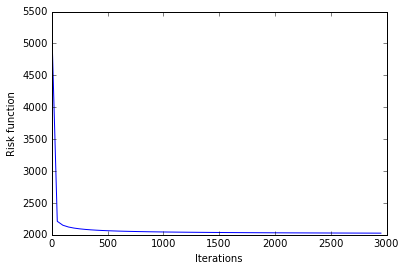

In [23]:
x = [i*50 for i in range(len(risk_function))]
plt.plot(x,risk_function)
plt.ylabel('Risk function')
plt.xlabel('Iterations')
plt.show()

In [65]:

weights3,risk_function3=batchgradient(Xtrain, Ytrain)

at iter 0
Risk fn value= 5292.18944784
weights are [ 0.02024637  0.00296991 -0.00213246  0.01373912  0.00860613  0.01701908
  0.0256252   0.0132539   0.0022273   0.01432966  0.01379178  0.00484095
 -0.14532859 -0.22287803 -0.08350323 -0.20622623 -0.3194726  -0.06067786
 -0.06213998 -0.56510828 -0.03216658 -0.03851881 -0.00951128 -0.02351881
 -0.31484686 -0.28308974 -0.20406664 -0.48424826 -0.15247852 -1.07423457
 -0.04935572 -0.46154783 -1.28103497]
at iter 1
Risk fn value= 5292.18944784
weights are [ 0.0863446   0.07071635  0.03363337  0.17569805  0.03726645  0.07832667
  0.10867708  0.06295814  0.01221636  0.06766773  0.06415687  0.02114419
  0.01972808 -0.19866964  0.01490911 -0.07499927 -0.34848508 -0.06796106
 -0.06892281 -0.6120438  -0.03694435 -0.0343197   0.00629308 -0.00401108
 -0.10870121 -0.19781374  0.08598249 -0.39347322  0.4745399  -0.79351509
  0.00824822 -0.46270879 -0.42596846]
at iter 2
Risk fn value= 5292.18944784
weights are [ 0.13103333  0.11041665  0.05665951  0.2

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


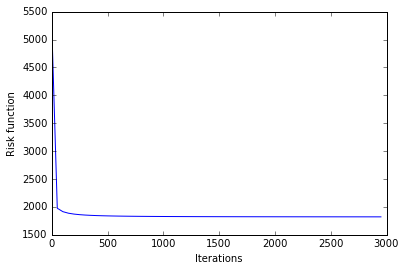

In [66]:
x = [i*50 for i in range(len(risk_function3))]
plt.plot(x,risk_function3)
plt.ylabel('Risk function')
plt.xlabel('Iterations')
plt.show()

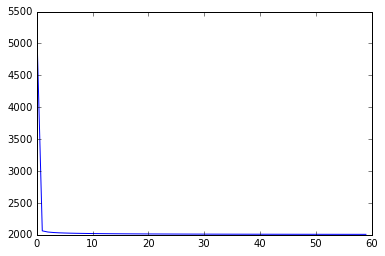

In [250]:
import matplotlib.pyplot as plt
plt.plot(risk_function)
#plt.ylabel('some numbers')
plt.show()

In [46]:
Xtrain2 = np.insert(Xtrain2, 32, values=1, axis=1)

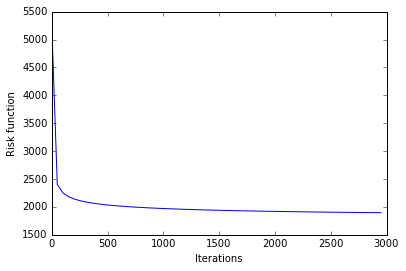

In [54]:
x = [i*50 for i in range(len(risk_function2))]
plt.plot(x,risk_function2)
plt.ylabel('Risk function')
plt.xlabel('Iterations')
plt.show()

In [53]:
weights2,risk_function2=batchgradient(Xtrain2, Ytrain)

at iter 0
Risk fn value= 5292.18944784
weights are [ 0.05303554  0.0525988   0.05249615  0.0529453   0.05273795  0.05295948
  0.05319546  0.05284406  0.05263684  0.05289213  0.0528988   0.05271028
  0.04873883  0.04618615  0.05028546  0.04669872  0.04371898  0.05092114
  0.05080835  0.03478876  0.05171551  0.0515706   0.05229555  0.05190941
  0.04397943  0.04335763  0.04642565  0.03799867  0.04842114  0.0215331
  0.05116727  0.03920153  0.97718965]
at iter 1
Risk fn value= 5292.18944784
weights are [ 0.03118653  0.0305957   0.02985296  0.03351335  0.02983928  0.03078037
  0.03186656  0.03028352  0.02941388  0.03044719  0.03048749  0.02966374
  0.02868596  0.022856    0.0290346   0.02597032  0.01875787  0.02711086
  0.02690165  0.00862764  0.02799599  0.02797529  0.02903874  0.02865595
  0.02478421  0.02177656  0.03157938  0.01552682  0.04455161  0.00442133
  0.02895962  0.01477901  0.98743968]
at iter 2
Risk fn value= 5292.18944784
weights are [  3.38544735e-02   3.29727375e-02   3.180

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [358]:
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices


In [243]:
w=np.array([0] * 33, 'float')

In [244]:
w[32]=1

In [ ]:
 g = ((1. / (1. + math.exp(-a))) - l) if -100. < a else (0. - l)

In [372]:
np.savetxt("hw4.csv", y_hat1, delimiter=",")

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
Xtrain = np.insert(Xtrain, 32, values=1, axis=1)

In [154]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [199]:
Xtrain2[0]

array([-2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509,  0.74193734, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509, -2.30258509, -2.30258509,
       -2.30258509, -2.30258509, -2.30258509,  0.09531018, -2.30258509,
       -2.30258509, -2.30258509])

In [205]:
#Xtrain2 = np.insert(Xtrain2, 32, values=1, axis=1)


weights2,risk_function2=batchgradient(Xtrain2, Ytrain)

at iter 0
Risk fn value= 5292.18944784
weights are [ 0.05303554  0.0525988   0.05249615  0.0529453   0.05273795  0.05295948
  0.05319546  0.05284406  0.05263684  0.05289213  0.0528988   0.05271028
  0.04873883  0.04618615  0.05028546  0.04669872  0.04371898  0.05092114
  0.05080835  0.03478876  0.05171551  0.0515706   0.05229555  0.05190941
  0.04397943  0.04335763  0.04642565  0.03799867  0.04842114  0.0215331
  0.05116727  0.03920153  0.97718965]
at iter 1
Risk fn value= 5292.18944784
weights are [ 0.03118653  0.0305957   0.02985296  0.03351335  0.02983928  0.03078037
  0.03186656  0.03028352  0.02941388  0.03044719  0.03048749  0.02966374
  0.02868596  0.022856    0.0290346   0.02597032  0.01875787  0.02711086
  0.02690165  0.00862764  0.02799599  0.02797529  0.02903874  0.02865595
  0.02478421  0.02177656  0.03157938  0.01552682  0.04455161  0.00442133
  0.02895962  0.01477901  0.98743968]
at iter 2
Risk fn value= 5292.18944784
weights are [  3.38544735e-02   3.29727375e-02   3.180

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


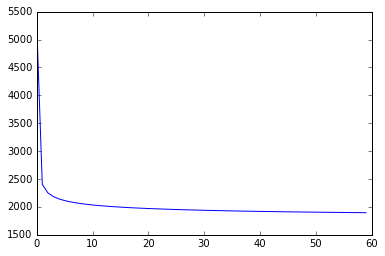

In [206]:
import matplotlib.pyplot as plt
plt.plot(risk_function2)
#plt.ylabel('some numbers')
plt.show()

In [207]:
risk_function2

array([ 5292.18944784,  2403.36763972,  2251.96806998,  2184.15058546,
        2142.72094462,  2113.47653809,  2091.15068992,  2073.25774433,
        2058.43230078,  2045.84510122,  2034.95591071,  2025.39417423,
        2016.89548106,  2009.2651449 ,  2002.35608921,  1996.05478644,
        1990.27197635,  1984.9363455 ,  1979.99010856,  1975.38584912,
        1971.08421663,  1967.05221838,  1963.26193349,  1959.68953142,
        1956.31451355,  1953.11912048,  1950.08786424,  1947.20715528,
        1944.46500264,  1941.85077079,  1939.35498096,  1936.96914763,
        1934.68564304,  1932.49758414,  1930.39873772,  1928.38344037,
        1926.44653044,  1924.58329012,  1922.78939559,  1921.06087425,
        1919.39406754,  1917.78559872,  1916.23234468,  1914.73141131,
        1913.28011172,  1911.87594716,  1910.51659   ,  1909.19986867,
        1907.92375425,  1906.6863484 ,  1905.48587267,  1904.3206588 ,
        1903.18914001,  1902.08984316,  1901.02138162,  1899.98244882,
      

In [211]:
weights3,risk_function3=batchgradient(Xtrain, Ytrain)

at iter 0
Risk fn value= 5292.18944784
weights are [  2.02463723e-04   2.96990782e-05  -2.13245614e-05   1.37391169e-04
   8.60612548e-05   1.70190752e-04   2.56252007e-04   1.32538953e-04
   2.22729706e-05   1.43296610e-04   1.37917782e-04   4.84094558e-05
  -1.45328591e-03  -2.22878026e-03  -8.35032263e-04  -2.06226227e-03
  -3.19472599e-03  -6.06778620e-04  -6.21399792e-04  -5.65108281e-03
  -3.21665775e-04  -3.85188076e-04  -9.51128457e-05  -2.35188076e-04
  -3.14846863e-03  -2.83089741e-03  -2.04066637e-03  -4.84248260e-03
  -1.52478516e-03  -1.07423457e-02  -4.93557241e-04  -4.61547829e-03
   9.77189650e-01]
at iter 1
Risk fn value= 5292.18944784
weights are [  4.09368878e-04   6.62446737e-05  -3.85479980e-05   2.90647337e-04
   1.74223716e-04   3.45457854e-04   5.18060703e-04   2.69464251e-04
   4.54068953e-05   2.91248224e-04   2.80062747e-04   9.80298936e-05
  -2.87087504e-03  -4.42929699e-03  -1.64914759e-03  -4.08589295e-03
  -6.35473950e-03  -1.20783699e-03  -1.23644216e-03

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


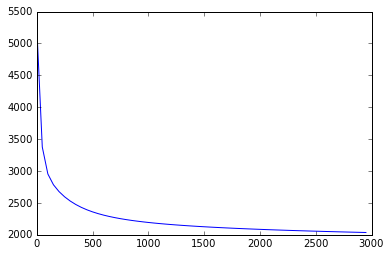

In [228]:
x = [i*50 for i in range(len(risk_function3))]
plt.plot(x,risk_function3)
#plt.ylabel('some numbers')
plt.show()

In [ ]:
def stochgradient(X,Y):
    max_iter=1000
    eps = 0.01
    w=np.array([0] * 32, 'float')
    risk_fn=np.zeros(len(Xtrain),dtype='float')
    for i in range(len(Xtrain)):
        risk_fn[i]=riskf(w,X,Y)
        w=w+eps*X[i]*(Y[i]-logistic(X[i].transpose().dot(w)))
        print("at iter",i)
        print("Risk fn value=",risk_fn[i])
        print("weights are",w)
    return (w,risk_fn)

In [242]:
Xtrain[0]

array([-0.10229178, -0.13590428, -0.08437152, -0.1773581 , -0.06741606,
       -0.09368598, -0.12567491, -0.10006237, -0.02785599, -0.09679595,
       -0.09103042, -0.03522139, -0.25454636,  2.41374463, -0.1670169 ,
       -0.26046041, -0.21595926, -0.11200274, -0.06715633, -0.26212114,
       -0.0867467 , -0.10495136, -0.08059635, -0.10208323, -0.3568812 ,
       -0.05867807, -0.22402555, -0.21451988,  0.14448992, -0.27306428,
       -0.07176893, -0.2465044 ,  1.        ])

In [76]:
for i in range(len(Xtest)):
    sig=logistic(weights3.dot(Xtest[i]))
    if sig>0.5:
        pred_values[i]=1
    else:
        pred_values[i]=0

In [37]:
pred_values=np.zeros(5857)

In [75]:
Xtest = np.insert(Xtest, 32, values=1, axis=1)

In [278]:
Xtest=tr["test_data"]

In [24]:
Xtest=np.asfarray(Xtest)
for i in range(0,32):
    Xtest[:,i]=preprocessing.scale(Xtest[:,i])

In [78]:
np.savetxt("hw4-1.csv", pred_values, delimiter=",")

In [300]:
weights

array([ 0.79545849,  0.1601574 ,  0.28149944,  0.47558817,  0.44806934,
        0.62318007,  0.77327187,  0.7103341 ,  0.13989124,  0.65442525,
        0.58835745,  0.35502504, -0.04707098, -0.24168684,  0.01083842,
       -0.23528706, -1.12044895, -0.51629313, -0.46934516, -1.52267377,
       -0.32952217, -0.1712851 ,  0.04174856,  0.068953  , -0.0652965 ,
       -0.16561682,  0.40198319, -0.20790414,  0.73550681, -0.6922238 ,
       -0.03356515, -0.76664905, -1.30516287])

In [1]:
np.log(logistic(3))

NameError: name 'np' is not defined

In [77]:
sum(pred_values)

1432.0

In [74]:
for i in range(0,5172):
    for j in range(0,32):
        if Xtest[i][j]>0:
            Xtest[i][j]=1
        else:
            Xtest[i][j]=0